# Table of Contents
## 1. Import Necessary Libraries
## 2. Data Loading
## 3. Data Cleansing
### 3.1 Remove White Space
### 3.2 NA Values
### 3.3 Outlier Values
## 4. Data Standardization/Normalization 
### 4.1 Scaling
### 4.2 Normalizing
## 5. Train/Validate Split
## 6. Feature Exploration
### 6.1 Exploratory Data Visualizations
### 6.2 Multi-collinearity analysis
## 7. Logistic Regression
## 8. Decision Tree
### 8.1 Feature Analysis
## 9. Random Forest
## 10. Support Vector Machines (SVM)
### 10.1 Feature Analysis
## 11. Artificial Neural Network (ANN)
## 12. k-Nearest Neighbors (k-NN)
## 13. Stacked Ensemble Model
## 14. Comparison of All Models
### 14.1 Percentage of Correct Classification (Accuracy)
##### 14.1.1 Logistic Regression
##### 14.1.2 Decision Tree
##### 14.1.3 Random Forest
##### 14.1.4 Support Vector Machines
##### 14.1.5 Artificial Neural Networks
##### 14.1.6 k-Nearest Neighbors
##### 14.1.7 Ensemble Model
### 14.2 Area Under ROC Curve
##### 14.2.1 Logistic Regression
##### 14.2.2 Decision Tree
##### 14.2.3 Random Forest
##### 14.2.4 Support Vector Machines
##### 14.2.5 Artificial Neural Networks
##### 14.2.6 k-Nearest Neighbors
##### 14.2.7 Ensemble Model
##### 14.2.8 All in
### 14.3 Brier's Score
##### 14.3.1 Logistic Regression
##### 14.3.2 Decision Tree
##### 14.3.3 Random Forest
##### 14.3.4 Artificial Neural Networks
##### 14.3.5 k-Nearest Neighbors
##### 14.3.6 Ensemble Model
### 14.4 Precision
##### 14.4.1 Logistic Regression
##### 14.4.2 Decision Tree
##### 14.4.3 Random Forest
##### 14.4.4 Support Vector Machines
##### 14.4.5 Artificial Neural Networks
##### 14.4.6 k-Nearest Neighbors
##### 14.4.7 Ensemble Model
### 14.5 Recall
##### 14.5.1 Logistic Regression
##### 14.5.2 Decision Tree
##### 14.5.3 Random Forest
##### 14.5.4 Support Vector Machines
##### 14.5.5 Artificial Neural Networks
##### 14.5.6 k-Nearest Neighbors
##### 14.5.7 Ensemble Model
### 14.6 F1 Score
##### 14.6.1 Logistic Regression
##### 14.6.2 Decision Tree
##### 14.6.3 Random Forest
##### 14.6.4 Support Vector Machines
##### 14.6.5 Artificial Neural Networks
##### 14.6.6 k-Nearest Neighbors
##### 14.6.7 Ensemble Model
## 16. References

# 1. Import Necessary Libraries

In [1]:
#standard imports
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
#data visualization
import seaborn as sns
#data preproessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
#packages for models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#import packages for metrics
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import brier_score_loss
import h2o
from h2o.automl import H2OAutoML
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading

In [5]:
#loading data into the code file from the Kaggle csv files
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [6]:
#print the first 5 rows to get a sense of the dataset
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [7]:
#print the first 5 rows to get a sense of the dataset
print(test.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [8]:
#gather descriptive statistics about dataset
summary_df = train.describe()
print(summary_df)

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [9]:
#print structure of data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
None


# 3. Data Cleansing

### 3.1 Remove Whitespace

In [10]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### 3.2 NA Values

Replace with central tendency metric

In [11]:
#are there any NA values?
train.isnull().values.any()

True

In [12]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncome and NumberOfDependents

In [13]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

MonthlyIncome has nearly 20% of it's data as missing. This is quote high and brings us to a decision point. We can drop this column entirely, drop the rows containing missing values, or impute the missing values. SimpleImputation may be subject to error since it would be applying a central tendency value to all 29731 of these rows; however, imputation is important since Machine Learning algorithms don't like missing values. We can also impute using a sophisticated, predictive method. 

From subject matter context, we know that monthly income is a feature important in our dataset and will elect to keep it. Therefore, we will be doing imputation for these missing values. 

In [14]:
#make a copy of training dataset
train_full = train.copy()

In [15]:
#save NA values with median of that column into variable
income_median = train_full['MonthlyIncome'].median()

In [16]:
#look at value of income median
income_median

5400.0

In [17]:
#impute NA values with Median
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [18]:
# check to see if there are any remaining NA values
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [19]:
#save median into variable for NumberOfDependents field
dependents_median = train_full['NumberOfDependents'].median()

In [20]:
#impute NA values with Median
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [21]:
#check if it worked
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### 3.3 Outlier Values

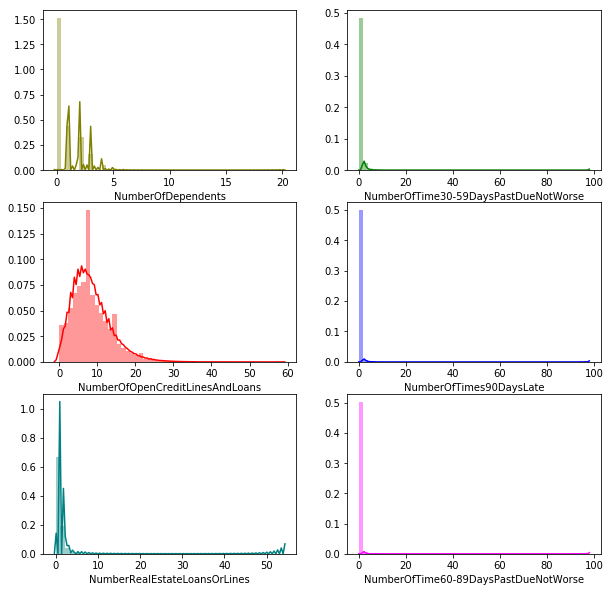

In [22]:
#check outliers in the distribution plots
df = train_full
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

As we can see by a subset of 6 variables, they are almost all largely skewed to the right, meaning that there are many outliers present in the data. We will now remove rows containing an outlier in any of the variables. 

In [23]:
#before: summarize the number of rows and columns in the dataset
print(df.shape)

(150000, 11)


In [24]:
#calculate the z-score and set the threshold
zscore = np.abs(stats.zscore(df.iloc[:,1:11]))
print(zscore)
threshold = 2.5

[[0.02115001 0.49385982 0.37659296 ... 4.40954554 0.05785249 1.14052977]
 [0.02038516 0.83234222 0.10041896 ... 0.90128301 0.05785249 0.23720186]
 [0.02158222 0.96773518 0.138087   ... 0.90128301 0.05785249 0.66612604]
 ...
 [0.02323239 0.38619443 0.10041896 ... 0.01614492 0.05785249 0.66612604]
 [0.02421753 1.50930703 0.10041896 ... 0.90128301 0.05785249 0.66612604]
 [0.02081306 0.79237332 0.10041896 ... 0.86899317 0.05785249 0.66612604]]


In [25]:
#show indexes of outliers
print(np.where(zscore >3))

(array([     0,      4,     44, ..., 149899, 149916, 149968], dtype=int64), array([7, 4, 5, ..., 9, 5, 9], dtype=int64))


In [26]:
#show an example zscore outlier
print(zscore[0][7])

4.409545538528969


Let's count outliers as anything greater than 2.5 zscores from the mean, as this is a common rule of thumb.

In [27]:
#set new dataframe to not include outlier rows with >2.5 zscore
df_full = df
df_full = df_full[(zscore < 2.5).all(axis=1)]
print(df_full.shape)

(137774, 11)


As you can see, the outliers reduction method reduced the number of rows in the dataset to 137,774 from 150,000.

In [28]:
#take a glance at new descriptive stats
print(df_full['SeriousDlqin2yrs'].describe())

count    137774.000000
mean          0.064076
std           0.244889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64


It looks like 12,226‬‬ outlier rows were removed. Let's see if this improves our histograms a bit.

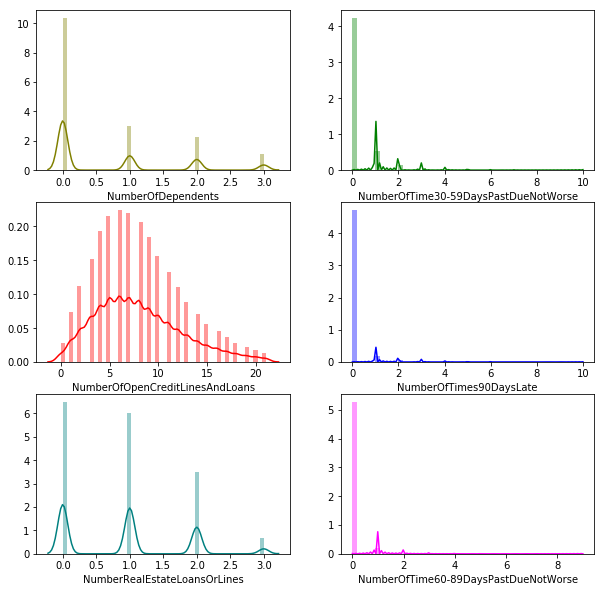

In [29]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df_full["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

There is certainly improvement! We will need to apply transforms to ensure normal distributions for regression. It is perfectly okay that the distributions are still skewed, now the outlier values have just been removed.

Now we have a dataset void of outliers and missing values - let's move onto visualizations and more preprocessing. 

# 4. Data Standardization/Normalization

### 4.1 Scaling

Some algorithms, such as Neural Networks, require data to be consolidated into a standard range, such as 0-1. I will create a standard range dataset using min/max normalization.

In [30]:
#assign MinMaxScaler function to scaler variable
scaler = MinMaxScaler()

#scale full dataframe into 0-1 by default
scaled_df = scaler.fit_transform(df_full)
scaled_df = pd.DataFrame(scaled_df, columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [31]:
#take a look at dataset
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.001554,0.279412,0.0,2.237903e-05,0.067387,0.190476,0.0,0.000000,0.000000,0.333333
1,0.0,0.001068,0.250000,0.1,1.562860e-05,0.078843,0.095238,0.1,0.000000,0.000000,0.000000
2,0.0,0.000380,0.132353,0.0,6.619479e-06,0.085530,0.238095,0.0,0.000000,0.000000,0.000000
3,0.0,0.000346,0.779412,0.0,6.896933e-05,0.090714,0.142857,0.0,0.333333,0.000000,0.333333
4,0.0,0.001225,0.264706,0.0,3.854940e-05,0.090714,0.380952,0.0,0.000000,0.000000,0.000000
5,0.0,0.000190,0.088235,0.0,8.446566e-03,0.139958,0.095238,0.0,0.000000,0.000000,0.000000
6,0.0,0.001046,0.132353,0.0,5.682633e-05,0.064795,0.238095,0.0,0.000000,0.000000,0.000000
7,0.0,0.000031,0.441176,0.0,9.759985e-05,0.168494,0.333333,0.0,0.666667,0.000000,0.666667
8,0.0,0.000017,0.367647,0.0,5.478408e-05,0.322785,0.619048,0.0,0.666667,0.000000,0.666667
9,1.0,0.001566,0.279412,0.3,7.032037e-05,0.355079,0.428571,0.3,0.333333,0.111111,0.666667


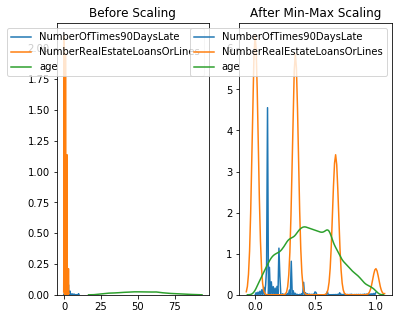

In [32]:
#plot example columns to see change of scaled dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_full['NumberOfTimes90DaysLate'], ax=ax1)
sns.kdeplot(df_full['NumberRealEstateLoansOrLines'], ax=ax1)
sns.kdeplot(df_full['age'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['NumberOfTimes90DaysLate'], ax=ax2)
sns.kdeplot(scaled_df['NumberRealEstateLoansOrLines'], ax=ax2)
sns.kdeplot(scaled_df['age'], ax=ax2)
plt.show()

Now all data points are scaled to the 0-1 range!

### 4.2 Normalizing

Some algorithms, such as Regression, require data to be normally distributed. We can create this by applying various transforms to the features such as log, square root, or cube root. The PowerTransformer function tests different transforms.

In [33]:
#make a copy of the full dataset
df_full2 = df_full[['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]
#save two normalizing methods into variables
bc = PowerTransformer(method='box-cox', standardize=False)
yj = PowerTransformer(method='yeo-johnson', standardize=False)

These two methods (Box-Cox and Yeo-Johnson) are mathematical operations to achieve close to normally distributed data. We will use them to transform our data and normalize it.

In [34]:
#apply yj transform to dataset
norm_df = yj.fit_transform(df_full2)
norm_df = pd.DataFrame(norm_df, columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [35]:
#merge target column back to normalized dataset
norm_df = pd.merge(df_full[['SeriousDlqin2yrs']], norm_df, left_index=True, right_index= True)

In [36]:
#pull descriptive stats on dataset
norm_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000
mean,0.063672,0.149191,20.878914,0.021390,0.480863,131.322010,3.772855,0.002720,0.521446,0.001924,0.171368
std,0.244169,0.126052,4.359937,0.049982,0.508651,40.933351,1.493157,0.011299,0.450670,0.008488,0.221967
min,0.000000,-0.000000,10.792723,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,0.000000,0.027714,17.682764,-0.000000,0.148763,110.449542,2.884606,-0.000000,-0.000000,-0.000000,-0.000000
50%,0.000000,0.118520,21.016471,-0.000000,0.276712,131.362228,3.635404,-0.000000,0.679993,-0.000000,-0.000000
75%,0.000000,0.275014,24.141101,-0.000000,0.504286,149.861315,4.892751,-0.000000,0.679993,-0.000000,0.402234
max,1.000000,0.425704,30.933683,0.138831,1.492729,344.361404,7.312339,0.049660,1.334339,0.039379,0.522334


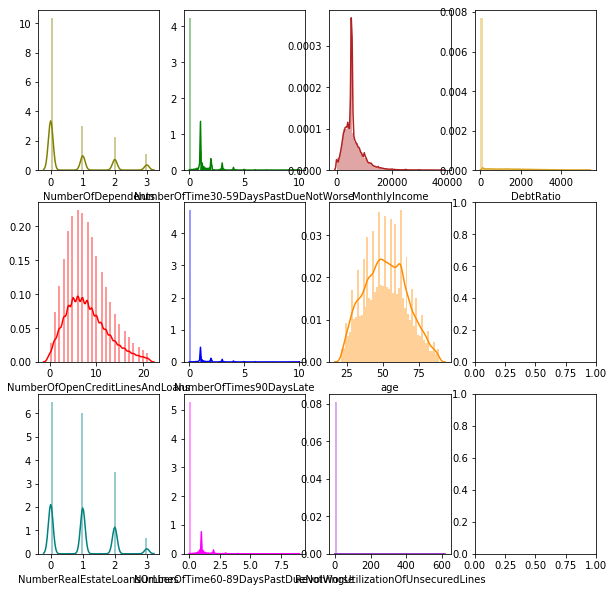

In [37]:
#plot features to see before normalization
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( df_full2["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full2["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full2["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full2["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full2["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full2["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( df_full2["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( df_full2["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( df_full2["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( df_full2["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

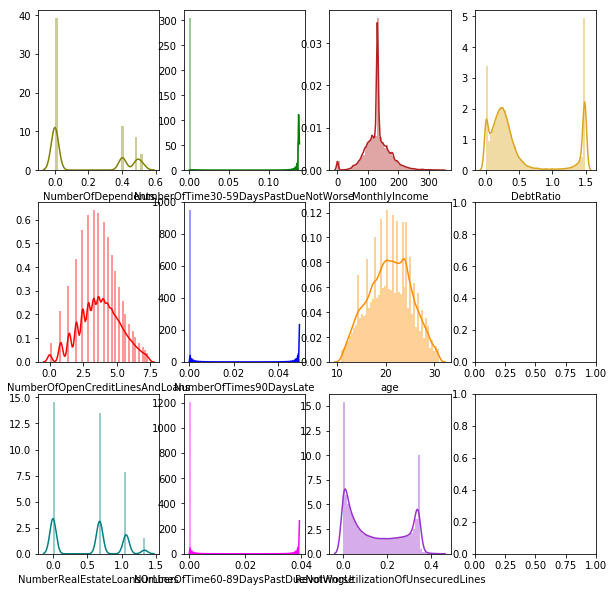

In [38]:
#plot features to see after normalization
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( norm_df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( norm_df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( norm_df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( norm_df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( norm_df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( norm_df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( norm_df["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( norm_df["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( norm_df["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( norm_df["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

As you can see, the yeo-johnson transform did improve the data's normal distribution.

# 5. Train/Validate Split

For training/validation, we will split into 80%/20% respectively. This is in order to give the algorithms a lot (100,000+) of data to train on and still ample data on which to validate.

In [39]:
#identify target column and predictor columns
columns=(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])
full_train_cols = pd.DataFrame(df_full, columns = columns)
full_train_target = pd.DataFrame(df_full['SeriousDlqin2yrs'])
#full, unscaled dataset split
fullxTrain, fullxTest, fullyTrain, fullyTest = train_test_split(full_train_cols, full_train_target, test_size = 0.2)

In [40]:
#identify target column and predictor columns
scaled_train_cols = pd.DataFrame(scaled_df, columns = columns)
scaled_train_target = pd.DataFrame(scaled_df['SeriousDlqin2yrs'])
#scaled dataset split
scaledxTrain, scaledxTest, scaledyTrain, scaledyTest = train_test_split(scaled_train_cols, scaled_train_target, test_size = 0.2)

In [41]:
#identify target column and predictor columns
norm_train_cols = pd.DataFrame(norm_df, columns = columns)
norm_train_target = pd.DataFrame(norm_df['SeriousDlqin2yrs'])
#normal distributed dataset split
normxTrain, normxTest, normyTrain, normyTest = train_test_split(norm_train_cols, norm_train_target, test_size = 0.2)

In [42]:
#take a look at the split for unscaled data
print(fullxTrain.shape, fullyTrain.shape)
print(fullxTest.shape, fullyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [43]:
#take a look at the split for scaled data
print(scaledxTrain.shape, scaledyTrain.shape)
print(scaledxTest.shape, scaledyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [44]:
#take a look at the split for normalized data
print(normxTrain.shape, normyTrain.shape)
print(normxTest.shape, normyTest.shape)

(101243, 10) (101243, 1)
(25311, 10) (25311, 1)


In [45]:
#take a look at the descriptive stats
print(fullxTrain.describe(), fullyTrain.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.377603      52.195248   
std                                4.538658      14.785531   
min                                0.000000      21.000000   
25%                                0.028983      41.000000   
50%                                0.149259      52.000000   
75%                                0.555156      63.000000   
max                              616.000000      89.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.237373     286.895685    5960.950871   
std                                0.680159     814.240192    3730.521352   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.1699

In [46]:
#take a look at the descriptive stats
print(fullxTest.describe(), fullyTest.describe())

       RevolvingUtilizationOfUnsecuredLines           age  \
count                          27555.000000  27555.000000   
mean                               0.425165     52.130938   
std                                6.770398     14.792042   
min                                0.000000     21.000000   
25%                                0.029417     41.000000   
50%                                0.149885     52.000000   
75%                                0.566562     63.000000   
max                              601.000000     89.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          27555.000000  27555.000000   27555.000000   
mean                               0.238251    283.113041    5906.790310   
std                                0.675715    810.561853    3714.205261   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.167513    3750.0000

In [47]:
#take a look at the descriptive stats
print(scaledxTrain.describe(), scaledyTrain.describe())
print(scaledxTest.describe(), scaledyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.000630       0.458282   
std                                0.008241       0.217385   
min                                0.000000       0.000000   
25%                                0.000048       0.294118   
50%                                0.000244       0.455882   
75%                                0.000906       0.617647   
max                                0.975649       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.023956       0.052338       0.154211   
std                                0.068363       0.149235       0.096441   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.0000

In [48]:
#print results for normalized train
print(normxTrain.describe(), normyTrain.describe())
#print results for normalized test
print(normxTest.describe(), normyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         101243.000000  101243.000000   
mean                               0.149637      20.874966   
std                                0.126189       4.359073   
min                               -0.000000      10.792723   
25%                                0.027817      17.682764   
50%                                0.119546      21.016471   
75%                                0.275862      24.141101   
max                                0.425704      30.933683   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         101243.000000  101243.000000  101243.000000   
mean                               0.021388       0.481614     131.224321   
std                                0.049980       0.508897      41.018142   
min                               -0.000000      -0.000000       0.000000   
25%                               -0.000000       0.1490

The purpose of printing out the descriptive stats for the training and testing datasets is to make sure the training data and testing data are representative of one another. You want your algorithm to be tested on similar distributions of data that it was trained on. As you can see, the testing and training data mimic eachother quite closely, since split wa made randomly.

# 6. Feature Exploration

### 6.1 Exploratory Data Visualizations

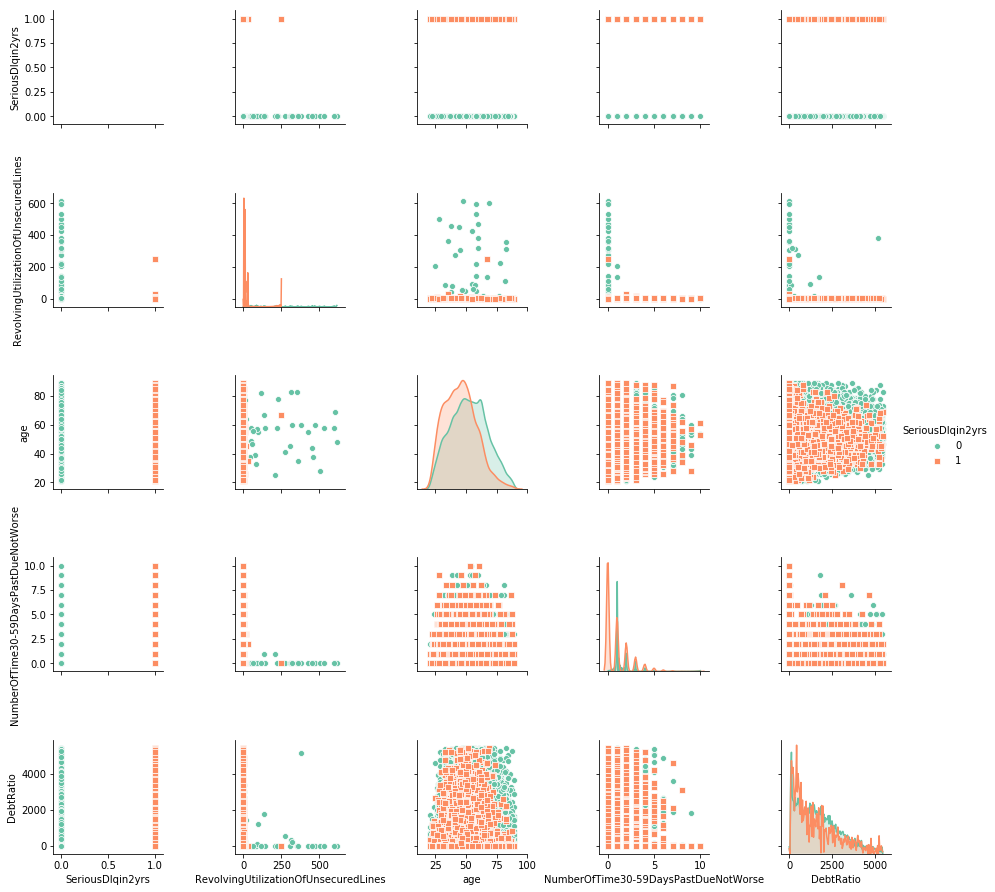

In [49]:
#create a pairplot to see scatter plots of all combinations of features
sns.pairplot(df_full.iloc[:,0:5], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

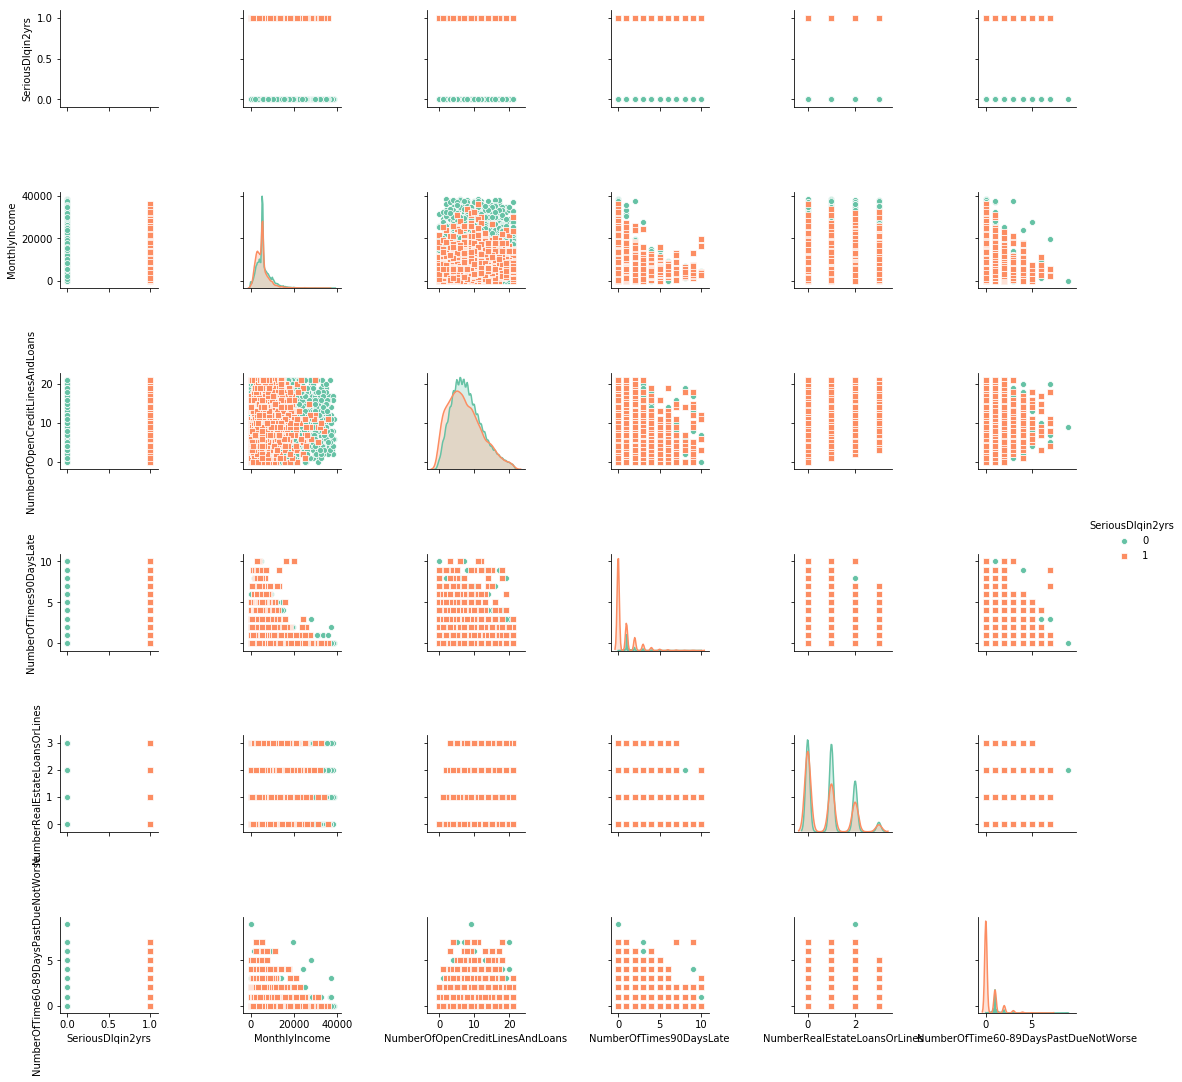

In [50]:
#create pairplot with remaining features
r = np.r_[0, 5:10]
sns.pairplot(df_full.iloc[:,r], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

In [51]:
#take a quick look at how many datapoints defaulted(1) vs didn't default (0)
normyTrain['SeriousDlqin2yrs'].value_counts()

0    94832
1     6411
Name: SeriousDlqin2yrs, dtype: int64

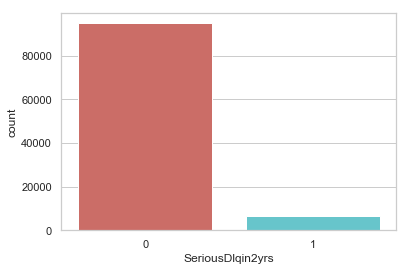

In [52]:
#graph distribution of target variable to visually see the difference
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='SeriousDlqin2yrs', data=normyTrain, palette ='hls')
plt.show()

Dataset is largely non-defaulted loans which means there is class imbalance, but we can still draw some strong conclusions/patterns from the 6457 defaulted loans ("1") through cross-validation and testing several algorithms.

In [53]:
#look at the relative percentages of default/no-default to add more context
count_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==1])
count_no_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==0])
pct_of_default = count_default/(count_default+count_no_default)
print("percentage of default", pct_of_default*100)
pct_of_no_default = count_no_default/(count_default+count_no_default)
print("percentage of no default", pct_of_no_default*100)

percentage of default 6.3322896397775645
percentage of no default 93.66771036022243


### 6.2 Multi-collinearity analysis

Whenever you use regression, the algorithms assume that data is numerical, normally distributed, and there is no multi-collinearity between points. Multi-collinearity means that one feature or several features are essentilly described by other features. This means thats there may be features that are "duplicative"; thus, you want to only have the necessary features in the algorithm.

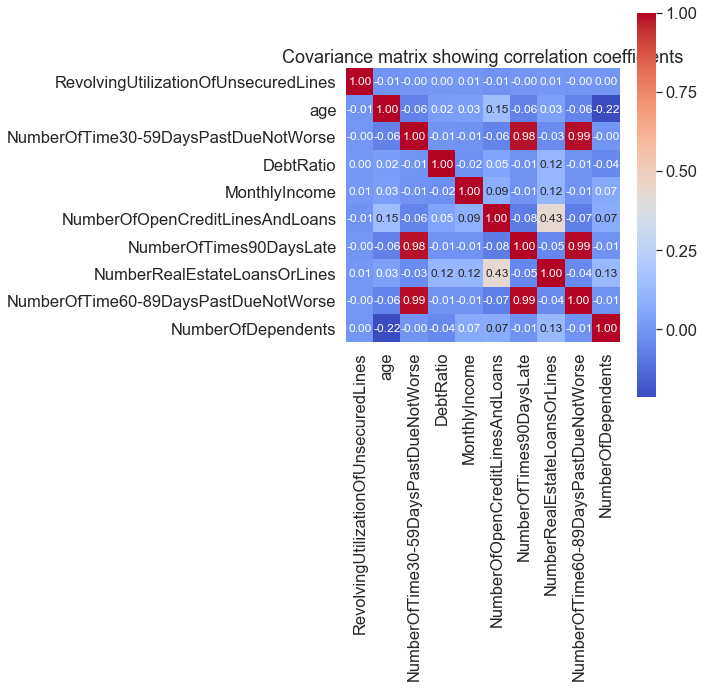

In [54]:
#create heatmap plot to show covariance between the different features in the dataset
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[columns].iloc[:,range(0,10)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

As you can see from this covariance matrix, the majority of features are not collinear. However, the # of days deliquent variables are highly collinear. This make sense logically because if a data point is late (whether it is 30 days, 60 days, 90 days, etc.) it is likely to result in a defaulted loan. Therefore, these features convey similar information which is why they have high correlations above.

# 7. Logistic Regression

In [55]:
#compare means of variables grouped by target variable
norm_df.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,0.149296,20.878136,0.021434,0.481345,131.319332,3.772140,0.002724,0.521312,0.001931,0.171347
1,0.147644,20.890359,0.020734,0.473772,131.361394,3.783361,0.002656,0.523415,0.001808,0.171686


This visual above takes a quick glance at the differences in means between the default datapoints and the no-default data points. At first glance, the differences in means are minimal, which means the distinctions the algorithm will draw on will likely be in non-central tendency data points.

In [56]:
#load in logistic regression package
logreg = LogisticRegression()

In [57]:
#rfe is to ensure all features will be revevent in using logistic regression
rfe = RFE(logreg, 20)
rfe = rfe.fit(normxTrain, normyTrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Looks like every variable is considered a strong predictor, according to Recursive Feature Elimination (RFE).

In [58]:
#load variables to be used in model
cols2 = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X = normxTrain[cols2]
y = normyTrain['SeriousDlqin2yrs']

In [59]:
# implement the model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.241642
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       -0.024    
Dependent Variable:         SeriousDlqin2yrs       AIC:                    48945.0980
Date:                       2020-01-15 17:52       BIC:                    49021.3002
No. Observations:           101243                 Log-Likelihood:         -24465.   
Df Model:                   7                      LL-Null:                -23895.   
Df Residuals:               101235                 LLR p-value:            1.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

The most important output here is the P values, since that quantifies the statistical significance. The lower the number, the more statistically significant. As you can see, the variables listed all have very low (<0.0000) p values.

In [60]:
#fit the model
logreg.fit(normxTrain,normyTrain.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
#predict accuracy of model on test data
y_pred_lr = logreg.predict(normxTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(normxTest, normyTest)))

Accuracy of logistic regression classifier on test set: 0.93


In [62]:
#print confusion matrix to show true positives, false positives, true negatives, false negatives
confusion_matrix_lr = confusion_matrix(normyTest, y_pred_lr)
print(confusion_matrix_lr)

[[23664     0]
 [ 1647     0]]


# 8. Decision Tree

In [63]:
#load model
dt_model = tree.DecisionTreeClassifier()
dt_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [64]:
#fit model
dt = dt_model.fit(fullxTrain,fullyTrain)
dt2 = dt_model2.fit(fullxTrain,fullyTrain)

Try to visualize decision tree

In [65]:
#predict on model
y_pred2 = dt_model2.predict(fullxTest)

In [66]:
#print accuracy
print('Accuracy:',dt_model2.score(fullxTest,fullyTest))

Accuracy: 0.936962438758846


In [67]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25694,77
True Default,1660,124


The algorithm had more false negatives than false positives.

### 8.1 Feature Analysis

In [68]:
print ("Find the optimal parameters for decision trees:")

#set parameters for DT feature analysis
param_dist = {"criterion": ["gini", "entropy"],"min_samples_split": randint(2, 20),"max_depth": randint(1, 20),"min_samples_leaf": randint(1, 20),"max_leaf_nodes": randint(2, 20)}
dtc = dt_model2

#define model with parameters
random_search = RandomizedSearchCV(dtc, param_dist, n_iter = 5, scoring = 'accuracy', cv = 5, random_state=1)
random_search.fit(fullyTest, y_pred2)
random_search.best_params_
params = random_search.best_params_

#make for loop that iterates through the best parameters
for keys,values in params.items():
    print(keys)
    print(values)

Find the optimal parameters for decision trees:
criterion
entropy
max_depth
12
max_leaf_nodes
14
min_samples_leaf
9
min_samples_split
11


In [69]:
#determine feature importance and assign to coef
featureList=[]  
coef = dt_model2.feature_importances_
featureList.append(coef)

#feature importance based off coefficient
print ("Beta for each feature: ")

#assign beta values and print result
coef = np.mean(featureList, axis = 0)
print (coef)

Beta for each feature: 
[0.29125447 0.         0.13406307 0.         0.         0.
 0.57132526 0.         0.0033572  0.        ]


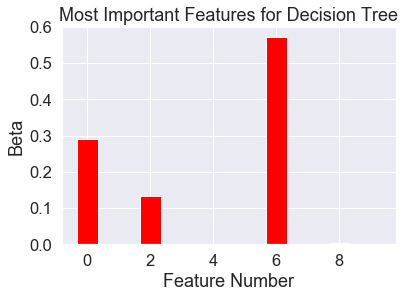

In [70]:
#plot feature importance
coefT = coef.transpose()
y = coefT
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="red")
plt.xlabel('Feature Number')
plt.ylabel('Beta')
plt.title('Most Important Features for Decision Tree')
plt.show()

In [71]:
#iterates through list and pulls highest beta value to determine feature importance
print ("The most important features are: ")
b = np.argsort(coefT)[-3:]
print(b)
names = list(df_full.columns.values)
lengthNames = len(names)
for index in range(lengthNames):
    if index in b:
        i = index + 4
        print (names[i])

The most important features are: 
[2 0 6]
DebtRatio
NumberOfOpenCreditLinesAndLoans
NumberOfDependents


# 9. Random Forest

In [72]:
#define random forest model
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [73]:
#fit model to training data
rf_model = rf.fit(fullxTrain, fullyTrain)

In [74]:
#print out of box score for rf model
rf.oob_score_

0.9288235240747965

In [75]:
#print rf model accuracy
print('Accuracy:',rf_model.score(fullxTest,fullyTest))

Accuracy: 0.934966430774814


In [76]:
#save prediction values 
y_pred3 = rf.predict(fullxTest)

#print out confusion matrix
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25493,278
True Default,1514,270


# 10. Support Vector Machines (SVM)

In [77]:
#define linear svm model
clf = LinearSVC(C = .05, multi_class='ovr', penalty='l2', random_state=1)
#fit model to training data
clf.fit(scaledxTrain,scaledyTrain)

LinearSVC(C=0.05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [78]:
#print predictions
print("Predictions form the classifier:")
print(clf.predict(scaledxTest))
print("Target values:")
print(scaledyTrain)

Predictions form the classifier:
[0. 0. 0. ... 0. 0. 0.]
Target values:
        SeriousDlqin2yrs
62810                1.0
92816                1.0
7413                 0.0
28242                0.0
11186                0.0
45958                0.0
109877               0.0
16835                0.0
127495               0.0
22666                0.0
89777                0.0
62831                0.0
114226               0.0
90276                0.0
56767                0.0
46217                0.0
16001                0.0
124889               0.0
72398                0.0
61241                0.0
71688                0.0
40941                1.0
107753               0.0
100281               0.0
4799                 0.0
88088                0.0
127188               0.0
17173                0.0
111154               0.0
51608                0.0
...                  ...
117103               0.0
116598               0.0
104718               0.0
11175                0.0
5427                 0.0
854

In [79]:
#save prediction values
y_pred_svm = clf.predict(scaledxTest)

#print accuracy score
print(metrics.accuracy_score(scaledyTest, y_pred_svm))

0.9377971330067139


### 10.1 Feature Analysis

In [80]:
#create feature list
featureList2 = []

#append beta values to list
coef = clf.coef_
featureList2.append(coef)

print ("Beta for each feature: ")

Beta for each feature: 


[ 0.20728687 -0.14500664  1.24622829 -0.03924735 -0.19322185 -0.00595181
  2.48476793 -0.00782753  1.77923034  0.01950689]


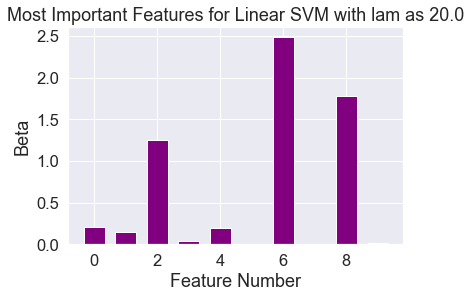

In [81]:
#plot feeature importance for linear svm
coef1 = np.mean(featureList2, axis = 0)
coef2 = np.mean(coef1, axis = 0)
print (coef2)
coefabs = abs(coef2)
coefT = coefabs.transpose()
y = coefT
N = len(y)    
x = range(N)
width = 1/1.5
lam = 1./.05
plt.bar(x, y, width, color="purple")
plt.xlabel('Feature Number')
plt.ylabel('Beta')
plt.title('Most Important Features for Linear SVM with lam as ' + str(lam))
plt.show()

In [82]:
#iterates through list and pulls highest beta value to determine feature importance
print ("The most important features are: ")
b = np.argsort(coefT)[-3:]
print (b)
names = list(df_full.columns.values)
lengthNames = len(names)
for index in range(lengthNames):
    if index in b:
        i = index
        print (names[i])

The most important features are: 
[2 8 6]
age
NumberOfOpenCreditLinesAndLoans
NumberRealEstateLoansOrLines


# 11. Artificial Neural Networks (ANN)

In [83]:
#define neural network model
ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

#fit model to training dataset
ann.fit(scaledxTrain, scaledyTrain.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [84]:
#store predictions into variable
predictions2 = ann.predict(scaledxTest)

In [85]:
#print confusion matrix and classification report
print(confusion_matrix(scaledyTest,predictions2))
print(classification_report(scaledyTest,predictions2))

[[25599   163]
 [ 1508   285]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     25762
         1.0       0.64      0.16      0.25      1793

   micro avg       0.94      0.94      0.94     27555
   macro avg       0.79      0.58      0.61     27555
weighted avg       0.92      0.94      0.92     27555



In [86]:
#print the accuracy score
print('Accuracy:',ann.score(scaledxTest,scaledyTest))

Accuracy: 0.9393576483396843


In [87]:
#store predictions into variable 
y_pred4 = ann.predict(scaledxTest)

#print confusion matrix
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25599,163
True Default,1508,285


# 12. k-Nearest Neighbors (k-NN)

In [88]:
#define and fit model
knn = KNeighborsClassifier()
knn.fit(scaledxTrain, scaledyTrain)
KNeighborsClassifier(algorithm='auto',
                     leaf_size=30,
                     metric='minkowski',
                     metric_params=None,
                     n_jobs=1,
                     n_neighbors=5,
                     p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
#print example prediction values
print("Predictions form the classifier:")
print(knn.predict(scaledxTest))
print("Target values:")
print(scaledyTrain)

Predictions form the classifier:
[0. 0. 0. ... 0. 0. 0.]
Target values:
        SeriousDlqin2yrs
62810                1.0
92816                1.0
7413                 0.0
28242                0.0
11186                0.0
45958                0.0
109877               0.0
16835                0.0
127495               0.0
22666                0.0
89777                0.0
62831                0.0
114226               0.0
90276                0.0
56767                0.0
46217                0.0
16001                0.0
124889               0.0
72398                0.0
61241                0.0
71688                0.0
40941                1.0
107753               0.0
100281               0.0
4799                 0.0
88088                0.0
127188               0.0
17173                0.0
111154               0.0
51608                0.0
...                  ...
117103               0.0
116598               0.0
104718               0.0
11175                0.0
5427                 0.0
854

In [90]:
#store predictions in variable
y_pred_knn = knn.predict(scaledxTest)

#print accuracy score
print(metrics.accuracy_score(scaledyTest, y_pred_knn))

0.9344583560152423


# 13. Stacked Ensemble Model

In [91]:
#define models for stacking
models = [logreg, dt_model2, rf, ann]

In [92]:
#define the stacked ensemble model
S_train, S_test = stacking(models,                   
                           fullxTrain, fullyTrain, fullxTest,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]
    fold  0:  [0.93803302]
    fold  1:  [0.93934858]
    fold  2:  [0.93848666]
    fold  3:  [0.93862275]
    fold  4:  [0.93948192]
    ----
    MEAN:     [0.93879459] + [0.00054473]
    FULL:     [0.93879458]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.93807839]
    fold  1:  [0.93771548]
    fold  2:  [0.93726184]
    fold  3:  [0.93726184]
    fold  4:  [0.93730436]
    ----
    MEAN:     [0.93752438] + [0.00032549]
    FULL:     [0.93752438]

model  2:     [RandomForestClassifier]
    fold  0:  [0.93494829]
    fold  1:  [0.93581020]
    fold  2:  [0.93603702]
    fold  3:  [0.93508438]
    fold  4:  [0.93694143]
    ----
    MEAN:     [0.93576426] + [0.00071976]
    FULL:     [0.93576425]

model  3:     [MLPClassifier]
    fold  0:  [0.93608238]
    fold  1:  [0.93875885]
    fold  2:  [0.93866812]
    fo

This stacked ensemble uses k-fold cross validation to train the algorithm on different "Folds" of the dataset. This method helps to improve representative samples and reduce bias. 

In [93]:
#define XGBoost model
ensemble_model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)

#fit XGBoost ensemble model
ensemble_model = ensemble_model.fit(S_train, fullyTrain)
y_pred_ensemble = ensemble_model.predict(S_test)

#print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(fullyTest, y_pred_ensemble))

Final prediction score: [0.93881328]


In [94]:
#create voting classifier for the stacked ensemble method
model_ens = VotingClassifier(estimators=[('lr', logreg), ('dt', dt_model2), ('rf', rf), ('ann', ann) ], voting='soft')
model_ens.fit(fullxTrain,fullyTrain)

#print accuracy score
model_ens.score(fullxTest,fullyTest)

0.9393213572854291

Now let's try using h2o.ai, which is a company that developes packages for AI and Machine Learning.

### 

In [95]:
#initialize h2o package instance
h2o.init()

#define h2o datasets
h2o_xtrain = h2o.H2OFrame(scaledxTrain)
h2o_ytrain = h2o.H2OFrame(scaledyTrain)
h2o_xtest = h2o.H2OFrame(scaledxTest)
h2o_ytest = h2o.H2OFrame(scaledyTest)
h2o_scaled_full = h2o.H2OFrame(scaled_df)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alexb\AppData\Local\Temp\tmpwqom0nr0
  JVM stdout: C:\Users\alexb\AppData\Local\Temp\tmpwqom0nr0\h2o_alexb_started_from_python.out
  JVM stderr: C:\Users\alexb\AppData\Local\Temp\tmpwqom0nr0\h2o_alexb_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.9
H2O cluster version age:,2 months and 17 days
H2O cluster name:,H2O_from_python_alexb_3c481q
H2O cluster total nodes:,1
H2O cluster free memory:,3.499 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [96]:
#convert target variable to factors/categorical data
h2o_ytrain = h2o_ytrain.asfactor()
h2o_ytest = h2o_ytest.asfactor()

In [97]:
#convert to list for h2o
x = scaled_train_cols.columns.tolist()

In [98]:
#bind final datset for h2o
h2o_scaled_train = h2o_ytrain.cbind(h2o_xtrain)
h2o_scaled_test = h2o_ytest.cbind(h2o_xtest)

#convert target response to factor
h2o_scaled_train['SeriousDlqin2yrs'] = h2o_scaled_train['SeriousDlqin2yrs'].asfactor()
h2o_scaled_test['SeriousDlqin2yrs'] = h2o_scaled_test['SeriousDlqin2yrs'].asfactor()

In [99]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y="SeriousDlqin2yrs", training_frame=h2o_scaled_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20200115_175518,0.863824,0.173438,0.281053,0.218205,0.0476135
GBM_2_AutoML_20200115_175518,0.863448,0.173914,0.275393,0.218692,0.0478262
GBM_grid_1_AutoML_20200115_175518_model_3,0.863429,0.178442,0.277275,0.219609,0.0482283
GBM_grid_1_AutoML_20200115_175518_model_1,0.86276,0.17587,0.284555,0.218413,0.0477044
GBM_3_AutoML_20200115_175518,0.861799,0.17496,0.270772,0.219342,0.0481111
GBM_grid_1_AutoML_20200115_175518_model_5,0.86127,0.175229,0.272605,0.21837,0.0476855
StackedEnsemble_BestOfFamily_AutoML_20200115_175518,0.860868,0.183759,0.274114,0.221481,0.0490539
StackedEnsemble_AllModels_AutoML_20200115_175518,0.858832,0.180579,0.288695,0.220426,0.0485876
GBM_5_AutoML_20200115_175518,0.857626,0.174911,0.284077,0.21849,0.047738
GBM_4_AutoML_20200115_175518,0.857304,0.177457,0.279396,0.22087,0.0487835


In [100]:
# The leader model is stored here
aml.leader

# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

h2o_predictions = aml.predict(h2o_scaled_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [101]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

h2o_predictions = aml.predict(h2o_scaled_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [102]:
#print predictions
h2o_predictions

predict,p0,p1
0,0.983307,0.0166929
0,0.980276,0.0197236
0,0.988302,0.0116978
0,0.991603,0.00839711
0,0.95805,0.0419504
0,0.968748,0.0312523
0,0.9905,0.00949953
0,0.983263,0.0167367
0,0.99171,0.0082902
0,0.992746,0.00725404


In [103]:
# H2O accuracy
h2o_predictions_df = h2o_predictions.as_data_frame()

#print accuracy score
print("H2O: " + str(accuracy_score(scaledyTest, h2o_predictions_df.predict)))

H2O: 0.9224460170567955


In [104]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(scaledyTest, h2o_predictions_df.predict),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,24556,1206
True Default,931,862


# 14. Comparison of All Models

### 14.1 Percentage of Correct Classification (Accuracy)

The percentage of correct classification metric simply measures how many data points the algorithm predicted correctly. 

##### 14.1.1 Logistic Regression

In [105]:
#print accuracy score
print('Accuracy:',accuracy_score(normyTest, y_pred_lr))

Accuracy: 0.9349294773023586


In [106]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(normyTest, y_pred_lr),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,23664,0
True Default,1647,0


###### 14.1.2 Decision Tree

In [107]:
#print accuracy score
print('Accuracy:',accuracy_score(fullyTest, y_pred2))

Accuracy: 0.936962438758846


In [108]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25694,77
True Default,1660,124


###### 14.1.3 Random Forest

In [109]:
#print accuracy score
print('Accuracy:',accuracy_score(fullyTest, y_pred3))

Accuracy: 0.934966430774814


In [110]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25493,278
True Default,1514,270


###### 14.1.4 Support Vector Machines

In [111]:
#print accuracy score
print('Accuracy:',accuracy_score(scaledyTest, y_pred_svm))

Accuracy: 0.9377971330067139


In [112]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred_svm),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25641,121
True Default,1593,200


###### 14.1.5 Artificial Neural Networks

In [113]:
#print accuracy score
print('Accuracy:',accuracy_score(scaledyTest, y_pred4))

Accuracy: 0.9393576483396843


In [114]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25599,163
True Default,1508,285


###### 14.1.6 k-Nearest Neighbors

In [115]:
#print accuracy score
print('Accuracy:',accuracy_score(scaledyTest, y_pred_knn))

Accuracy: 0.9344583560152423


In [116]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred_knn),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25460,302
True Default,1504,289


###### 14.1.7 Ensemble Model

In [117]:
#print accuracy score
print('Accuracy:',accuracy_score(fullyTest, y_pred_ensemble))

Accuracy: 0.9388132825258574


In [118]:
#print confusion matrix
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred_ensemble),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25600,171
True Default,1515,269


### 14.2 Area Under ROC Curve

The Area Under the ROC curve metric measures the tuning and bias of an algorithm. More specifically, it assesses the probability/likelihood of the model leaning on the side of caution when making predicitons. This means if it is more confident in its true positive or true negative guesses. The higher the AUC, the better the model at avoiding unwanted false positive errors. It is a measure of the true positive rate over the false positive rate.

###### 14.2.1 Logistic Regression

In [119]:
#define ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(normyTest, y_pred_lr)

In [120]:
#print AUC score
auc_lr = roc_auc_score(normyTest, y_pred_lr)
print('AUC lr:%.3f'% auc_lr)

AUC lr:0.500


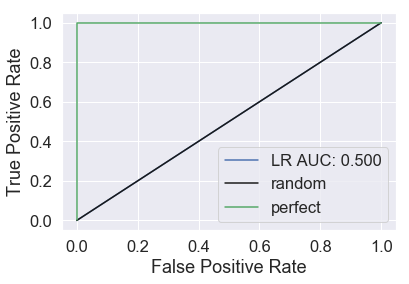

In [121]:
#plot ROC curve
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.2 Decision Tree

In [122]:
#define ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(fullyTest, y_pred2)

In [123]:
#print AUC score
auc_dt = roc_auc_score(fullyTest, y_pred2)
print('AUC dt:%.3f'% auc_dt)

AUC dt:0.533


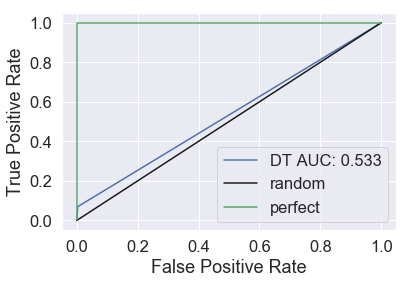

In [124]:
#plot ROC score
plt.plot(fpr_dt,tpr_dt,'b-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.3 Random Forest

In [125]:
#define ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(fullyTest, y_pred3)

In [126]:
#print AUC score
auc_rf = roc_auc_score(fullyTest, y_pred3)
print('AUC rf:%.3f'% auc_rf)

AUC rf:0.570


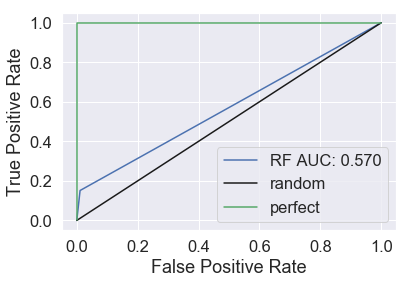

In [127]:
#plot ROC curve
plt.plot(fpr_rf,tpr_rf,'b-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.4 Support Vector Machines

In [128]:
#define ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(scaledyTest, y_pred_svm)

In [129]:
#print AUC score
auc_svm = roc_auc_score(scaledyTest, y_pred_svm)
print('AUC svm:%.3f'% auc_svm)

AUC svm:0.553


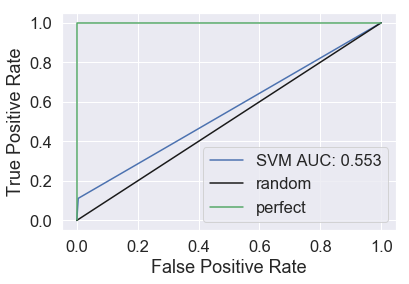

In [130]:
#plot ROC curve
plt.plot(fpr_svm,tpr_svm,'b-', label= 'SVM AUC: %.3f'%auc_svm)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.5 Artificial Neural Networks

In [131]:
#define ROC curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(scaledyTest, y_pred4)

In [132]:
#print AUC score
auc_ann = roc_auc_score(scaledyTest, y_pred4)
print('AUC ann:%.3f'% auc_ann)

AUC ann:0.576


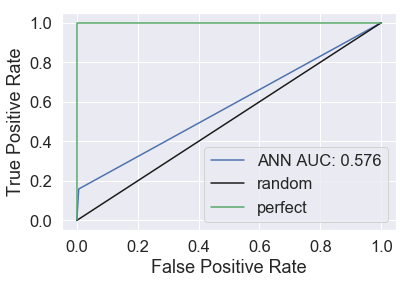

In [133]:
#plot ROC curve
plt.plot(fpr_ann,tpr_ann,'b-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.6 k-Nearest Neighbors

In [134]:
#define ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(scaledyTest, y_pred_knn)

In [135]:
#print AUC score
auc_knn = roc_auc_score(scaledyTest, y_pred_knn)
print('AUC knn:%.3f'% auc_knn)

AUC knn:0.575


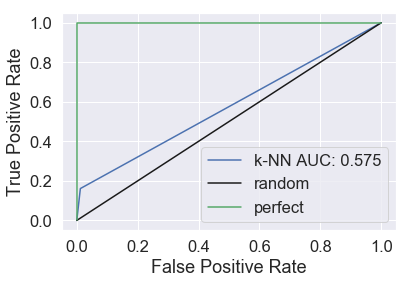

In [136]:
#plot ROC curve
plt.plot(fpr_knn,tpr_knn,'b-', label= 'k-NN AUC: %.3f'%auc_knn)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.7 Ensemble Model

In [137]:
#define ROC curve
fpr_ens, tpr_ens, thresholds_ens = roc_curve(fullyTest, y_pred_ensemble)

In [138]:
#print AUC score
auc_ens = roc_auc_score(fullyTest, y_pred_ensemble)
print('AUC ens:%.3f'% auc_ens)

AUC ens:0.572


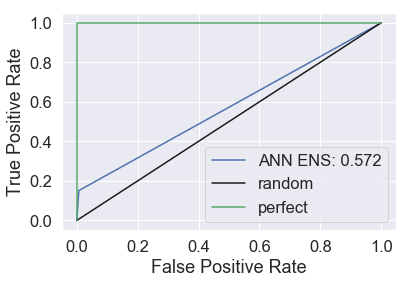

In [139]:
#plot ROC curve with AUC
plt.plot(fpr_ens,tpr_ens,'b-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### 14.2.8 All in

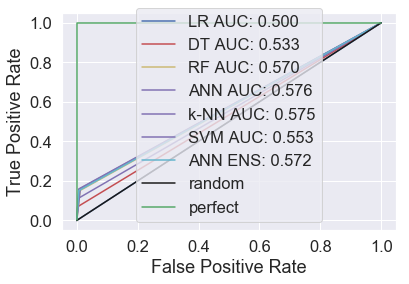

In [140]:
#plot all scores together
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot(fpr_dt,tpr_dt,'r-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot(fpr_rf,tpr_rf,'y-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot(fpr_ann,tpr_ann,'m-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot(fpr_knn,tpr_knn,'m-', label= 'k-NN AUC: %.3f'%auc_knn)
plt.plot(fpr_svm,tpr_svm,'m-', label= 'SVM AUC: %.3f'%auc_svm)
plt.plot(fpr_ens,tpr_ens,'c-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 14.3 Brier's Score

The Brier's Score is an accuracy measure for probabilistic functions that penalizes the distance from the expected value when making probabilistic predictions. It is a log loss method that measures the mean squared difference in predicted probability versus actual outcome. The lower the Brier's score, the better the model is calibrated.

###### 14.3.1 Logistic Regression

In [141]:
# predict probabilities
probs = logreg.predict_proba(normxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(normyTest, probs)
print(loss)

0.06083813605818712


###### 14.3.2 Decision Tree

In [142]:
# predict probabilities
probs = dt_model2.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.0494589723539917


###### 14.3.3 Random Forest

In [143]:
# predict probabilities
probs = rf.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.0537119392139268


###### Support Vector Machines - can't calculate

###### 14.3.4 Artificial Neural Networks

In [144]:
# predict probabilities
probs = ann.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(scaledyTest, probs)
print(loss)

0.06509118272514941


###### 14.3.5 k-Nearest Neighbors

In [145]:
# predict probabilities
probs = knn.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(scaledyTest, probs)
print(loss)

0.06522954091816367


##### 14.3.6 Ensemble Model

In [146]:
# predict probabilities
probs = model_ens.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.048971605880839826


### 14.4 Precision

Precision focuses on the "positive" cases, which in our use case is defulting on a loan. It measures the precision with which a model predicts positive when the data point is actually positive. Precision is a good measure to use when you are concerned with the potential costs of false positives. A false positive in our case would be the model predicting that someone would default on a loan, but they didn't actually. This cost is not as bad as false positives in our context. The higher the better.

###### 14.4.1 Logistic Regression

In [147]:
#calculate precision score
precision_score(normyTest, y_pred_lr)

0.0

###### 14.4.2 Decision Tree

In [148]:
#calculate precision score
precision_score(fullyTest, y_pred2)

0.6169154228855721

###### 14.4.3 Random Forest

In [149]:
#calculate precision score
precision_score(fullyTest, y_pred3)

0.4927007299270073

###### 14.4.4 Support Vector Machines

In [150]:
#calculate precision score
precision_score(scaledyTest, y_pred_svm)

0.6230529595015576

###### 14.4.5 Artificial Neural Networks

In [151]:
#calculate precision score
precision_score(scaledyTest, y_pred4)

0.6361607142857143

###### 14.4.6 k-Nearest Neighbors

In [152]:
#calculate precision score
precision_score(scaledyTest, y_pred_knn)

0.4890016920473773

##### 14.4.7 Ensemble Model

In [153]:
#calculate precision score
precision_score(fullyTest, y_pred_ensemble)

0.6113636363636363

### 14.5 Recall

Recall focuses on the "false negative" cases vs true positive cases, which in our use case is defulting on a loan. It measures the precision with which a model predicts negative when the data point is actually positive. Recall is a good measure to use when you are concerned with the potential costs of false negatives. A false negative in our case would be the model predicting that someone would NOT default on a loan, but they actual do. . This cost is bad for our context. The higher the better in our case.

###### 14.5.1 Logistic Regression

In [154]:
#calculate recall score
recall_score(normyTest, y_pred_lr)

0.0

###### 14.5.2 Decision Tree

In [155]:
#calculate recall score
recall_score(fullyTest, y_pred2)

0.06950672645739911

###### 14.5.3 Random Forest

In [156]:
#calculate recall score
recall_score(fullyTest, y_pred3)

0.15134529147982062

###### 14.5.4 Support Vector Machines

In [157]:
#calculate recall score
recall_score(scaledyTest, y_pred_svm)

0.11154489682097044

###### 14.5.5 Artificial Neural Networks

In [158]:
#calculate recall score
recall_score(scaledyTest, y_pred4)

0.15895147796988288

###### 14.5.6 k-Nearest Neighbors

In [159]:
#calculate recall score
recall_score(scaledyTest, y_pred_knn)

0.1611823759063023

##### 14.5.7 Ensemble Model

In [160]:
#calculate recall score
recall_score(fullyTest, y_pred_ensemble)

0.1507847533632287

### 14.6 F1 Score

F1 is a measure of precision and recall and is good to use when a balcne of precision and recall is needed for business reasons. This is largely the case in our project context. The F1 score is essentially a weighted average between precision and recall. The formula is F1 = 2 * (precision * recall) / (precision + recall). The higher the better.

###### 14.6.1 Logistic Regression

In [161]:
#calculate and print f1 score
f1_score(normyTest, y_pred_lr)

0.0

###### 14.6.2 Decision Tree

In [162]:
#calculate and print f1 score
f1_score(fullyTest, y_pred2)

0.12493702770780858

###### 14.6.3 Random Forest

In [163]:
#calculate and print f1 score
f1_score(fullyTest, y_pred3)

0.2315608919382504

###### 14.6.4 Support Vector Machines

In [164]:
#calculate and print f1 score
f1_score(fullyTest, y_pred_svm)

0.019002375296912115

###### 14.6.5 Artificial Neural Networks

In [165]:
#calculate and print f1 score
f1_score(scaledyTest, y_pred4)

0.2543507362784471

###### 14.6.6 k-Nearest Neighbors

In [166]:
#calculate and print f1 score
f1_score(scaledyTest, y_pred_knn)

0.24244966442953017

##### 14.6.7 Ensemble Model

In [167]:
#calculate and print f1 score
f1_score(fullyTest, y_pred_ensemble)

0.24190647482014385

# 15. References

https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/b

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

https://medium.com/towards-artificial-intelligence/feature-selection-and-dimensionality-reduction-using-covariance-matrix-plot-b4c7498abd07

https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

https://www.kaggle.com/rtatman/practical-model-evaluation-day-2?utm_medium=email&utm_source=intercom&utm_campaign=automl-event

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#automl-output